# Visualization in Python

## Quick introduction to Matplotlib

Matplotlib is the most famous visualization library in Python.  It has features that are very similar to the plotting features in Matlab.  We actually won't use Matplotlib much in Math 10 (we will use Altair more), so this will just be a short introduction.

There are a few different ways to use Matplotlib (which I think made it difficult for me to learn Matplotlib).  The way we will present Matplotlib in Math 10 involves a little more writing but offers more flexibility and is more similar to typical Python code.  Here is a relevant quote from the [Matplotlib documentation](https://matplotlib.org/stable/tutorials/introductory/lifecycle.html#a-note-on-the-object-oriented-api-vs-pyplot):

> We call methods that do the plotting directly from the Axes, which gives us much more flexibility and power in customizing our plot... In general, try to use the object-oriented interface over the pyplot interface.


In [1]:
x = [70,95,60,110,80]
y = [200,150,120,190,120]

In [2]:
import matplotlib.pyplot as plt

For now don't worry too much about what the line `fig, ax = plt.subplots()` is doing.  You should imagine that `plt.subplots()` is returning two objects, one which we name `fig` and one which we name `ax`.  The `fig` object is what shows the image, and the `ax` object is where we do the plotting.  There is also a version where `ax` is an array of axes objects.

The line `ax.plot(x,y)` behaves very similarly to Matlab.  We think of `x` as holding the x-coordinates and `y` as holding the y-coordinates.  Matplotlib then connects the dots with straight lines, just like in Matlab.

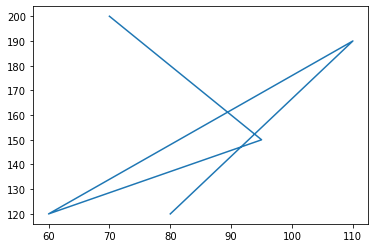

In [4]:
fig, ax = plt.subplots()
ax.plot(x,y)

In [5]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

It's very similar to make a scatter plot instead of a line plot.

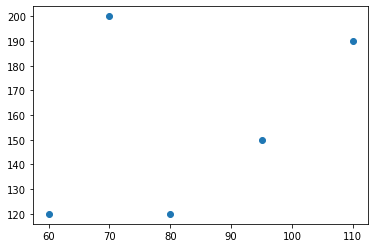

In [6]:
fig, ax = plt.subplots()
ax.scatter(x,y)

The `fig` object is what displays the image.

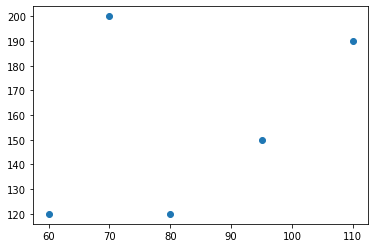

In [7]:
fig

## Using NumPy and Matplotlib to plot cos(x)

Let's plot y = cos(x) for x between 0 and 2pi.  Our first attempt has lots of mistakes.

In [8]:
x1 = range(0,2*pi)

NameError: name 'pi' is not defined

In [9]:
import numpy as np

In [10]:
np.pi

3.141592653589793

Remember that `range` can only take integer arguments.

In [12]:
x1 = range(0,2*np.pi)

TypeError: 'float' object cannot be interpreted as an integer

NumPy provides a function very similar to `range`.  The NumPy version is called `arange`, and it accepts float arguments.

In [13]:
x1 = np.arange(0,2*np.pi)

Python's `range` makes objects of type `range`.  NumPy's `arange` makes objects of type `numpy.ndarray`, which is the most common data type in NumPy.

In [14]:
type(x1)

numpy.ndarray

Now let's try to make the y-coordinates.

In [15]:
y1 = cos(x1)

NameError: name 'cos' is not defined

In [16]:
y1 = np.cos(x1)

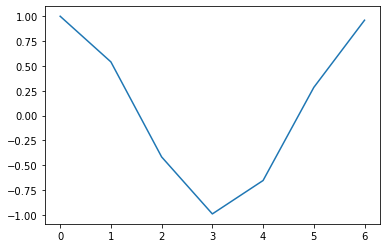

In [17]:
fig, ax = plt.subplots()
ax.plot(x1,y1)

It doesn't look very good because the step size is too big.  By default, `arange` (and `range`) uses a step size of 1.

In [18]:
x1

array([0., 1., 2., 3., 4., 5., 6.])

In [19]:
x1.shape

(7,)

Here we use a step size of 0.01.

In [21]:
x2 = np.arange(0,2*np.pi,0.01)
y2 = np.cos(x2)

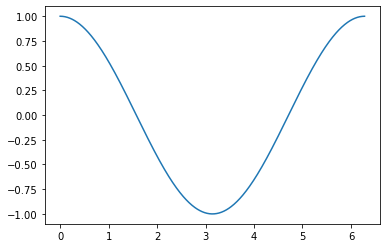

In [22]:
fig, ax = plt.subplots()
ax.plot(x2,y2)

## Plotting based on the Grammar of Graphics

Here we will introduce three more plotting libraries: Altair (the most important for us in Math 10), Seaborn, and Plotly.  These three libraries are very similar to each other (not so similar to Matplotlib, although Seaborn is built on top of Matplotlib), and I believe all three are based on a notion called the *Grammar of Graphics*.  (Here is the book [The Grammar of Graphics](https://link.springer.com/book/10.1007/0-387-28695-0), which is freely available to download from on campus or using VPN.)

Here is the basic setup:
* We have a pandas DataFrame, and each row in the DataFrame corresponds to one *observation* (or one data point).
* Columns in the DataFrame correspond to different variables.
* To produce the visualizations, we encode different columns from the DataFrame into visual properties of the chart.

In [23]:
import pandas as pd

Making a pandas DataFrame using our same `x` and `y` lists from above.

In [24]:
x

[70, 95, 60, 110, 80]

In [25]:
y

[200, 150, 120, 190, 120]

In [26]:
df = pd.DataFrame({"height":x, "weight":y})

In [27]:
df

,height,weight
0,70,200
1,95,150
2,60,120
3,110,190
4,80,120


In [28]:
df.columns

Index(['height', 'weight'], dtype='object')

Let's first plot this data using Seaborn, which I think is the most famous member of this family of plotting libraries.

In [29]:
import seaborn as sns

Notice that we specify the pandas DataFrame which holds the data, as well as which column to use for the x-coordinates and which column to use for y-coordinates.  By default, Seaborn sorts the data so that the x-coordinates are increasing (that's why the lines do not cross each other here).

<AxesSubplot:xlabel='height', ylabel='weight'>

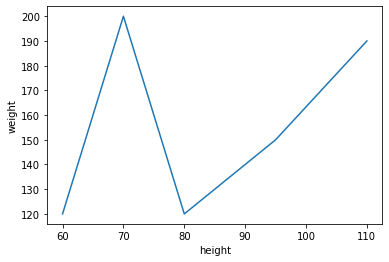

In [32]:
sns.lineplot(
    data=df,
    x="height",
    y="weight"
)

The term `data` above is what's called a *keyword argument*.  It gets temporarily given the value `df`, but that only happens locally, we do not have any record of that ourselves.

In [33]:
data

NameError: name 'data' is not defined

Here is the Plotly version of the same plot.

In [34]:
import plotly.express as px

This is very similar.  It uses the keyword argument `data_frame` instead of `data`, and it does not order the x-values, but otherwise it is quite similar.

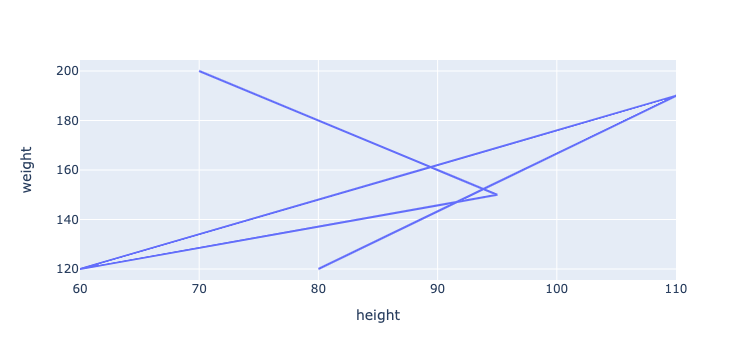

In [36]:
px.line(
    data_frame=df,
    x="height",
    y="weight"
)

Here is the Altair version of the same plot.  Altair is the plotting library we will use most often in Math 10.  The syntax is a little different from the Seaborn and Plotly syntax.  It is worth practicing with this Altair syntax until you get comfortable with it.

In [37]:
import altair as alt

In [38]:
alt.Chart(data=df).mark_line().encode(
    x="height",
    y="weight"
)

alt.Chart(...)

If we want to change from a line plot to a scatter plot, in Altair, we change `mark_line` to `mark_circle`.

In [39]:
alt.Chart(data=df).mark_circle().encode(
    x="height",
    y="weight"
)

alt.Chart(...)

Let's see how to change the domain shown on the x-axis.  As an intermediate step, we give the longer version of the same code as above.  We change `x="height"` to `x=alt.X("height")`.  So far, this does not change the chart.

In [41]:
alt.Chart(data=df).mark_circle().encode(
    x=alt.X("height"),
    y="weight"
)

alt.Chart(...)

Now we add a new keyword argument inside `alt.X` which specifies that the x-values should be displayed between -100 and 500.

In [42]:
alt.Chart(data=df).mark_circle().encode(
    x=alt.X("height", scale=alt.Scale(domain=(-100,500))),
    y="weight"
)

alt.Chart(...)

If instead you want Altair to choose for you, but not force 0 to be included, you can specify `zero=False`.  Here it zooms in as much as possible.  (For now it is only changing the x-values, not the y-values, because we are only using `alt.X`, not `alt.Y`.)

In [44]:
alt.Chart(data=df).mark_circle().encode(
    x=alt.X("height", scale=alt.Scale(zero=False)),
    y="weight"
)

alt.Chart(...)

Let's recall what data is in `df`.

In [45]:
df

,height,weight
0,70,200
1,95,150
2,60,120
3,110,190
4,80,120


Here is a method for creating a new column in a DataFrame.  The most important thing is that the number of values we provide is equal to the number of rows.  That's why we give 5 state names in this case.

In [47]:
df["state"] = ["California","California","Oregon","Nevada","Arizona"]

In [48]:
df

,height,weight,state
0,70,200,California
1,95,150,California
2,60,120,Oregon
3,110,190,Nevada
4,80,120,Arizona


Let's add one more column, containing floats.

In [49]:
df["GPA"] = [1.5, 2.4, 4, 3.5, 4.7]

In [50]:
df

,height,weight,state,GPA
0,70,200,California,1.5
1,95,150,California,2.4
2,60,120,Oregon,4.0
3,110,190,Nevada,3.5
4,80,120,Arizona,4.7


Here we encode the "state" column into the color of the chart, and we encode the "GPA" column into the size of the points.

In [52]:
alt.Chart(data=df).mark_circle().encode(
    x=alt.X("height", scale=alt.Scale(zero=False)),
    y="weight",
    color="state",
    size="GPA"
)

alt.Chart(...)

Everything works very similarly in Seaborn and in Plotly.  Here is the Seaborn version.

<AxesSubplot:xlabel='height', ylabel='weight'>

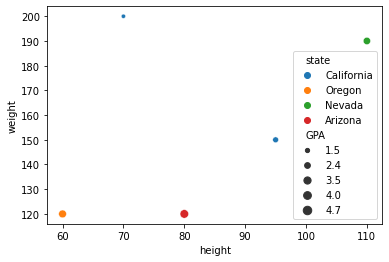

In [53]:
sns.scatterplot(
    data=df,
    x="height",
    y="weight",
    hue="state",
    size="GPA"
)

Here is the Plotly version.

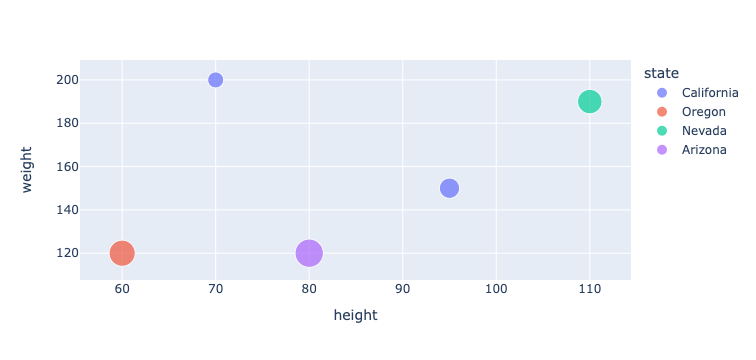

In [54]:
px.scatter(
    data_frame=df,
    x="height",
    y="weight",
    color="state",
    size="GPA"
)

Let's access the row at index 2 of the DataFrame.  Using `df[2]` doesn't work; if we use `df[2]`, pandas is looking for a column with the name 2.

In [55]:
df[2]

KeyError: 2

Here is the right way to find the row at index 2.

We think of each row as corresponding to one observation.  In this case, each row could correspond to one person.  It's worth looking at the data in this row, and looking back at the three plots from Altair, Seaborn, and Plotly, and seeing how this data is encoded in one of the 5 data points from these charts.  The point is at coordinates (60,120), it is colored according to the state being "Oregon", and the size corresponds to the GPA value.

In [57]:
df.iloc[2]

height        60
weight       120
state     Oregon
GPA          4.0
Name: 2, dtype: object

If you try to use `px.scatter(data=...)` you will get an error.  It needs to be `px.scatter(data_frame=...)`.  This `data_frame` is a keyword argument to the `scatter` function, as you can see at the beginning of the documentation.

In [58]:
help(px.scatter)

Help on function scatter in module plotly.express._chart_types:

scatter(data_frame=None, x=None, y=None, color=None, symbol=None, size=None, hover_name=None, hover_data=None, custom_data=None, text=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, error_x=None, error_x_minus=None, error_y=None, error_y_minus=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, orientation=None, color_discrete_sequence=None, color_discrete_map=None, color_continuous_scale=None, range_color=None, color_continuous_midpoint=None, symbol_sequence=None, symbol_map=None, opacity=None, size_max=None, marginal_x=None, marginal_y=None, trendline=None, trendline_options=None, trendline_color_override=None, trendline_scope='trace', log_x=False, log_y=False, range_x=None, range_y=None, render_mode='auto', title=None, template=None, width=None, height=None)
        In a scatter plot, each row of `data_frame` is represented by a sy